In [ ]:
!nvidia-smi


Mon May 10 10:29:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    77W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
drive.mount('/content/drive')
plt.rcParams['figure.figsize']=14,8
RANDOM_SEED = 100

cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

train_path = 'drive/MyDrive/ML_Project/chest_xray/train/'
test_path = 'drive/MyDrive/ML_Project/chest_xray/test/'

image_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    'test':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

def train_val_split(dataset , split = 0.2):
    train_idx , val_idx = train_test_split(list(range(len(dataset))), test_size = split, random_state = RANDOM_SEED)
    train_set = torch.utils.data.Subset(dataset, train_idx)
    val_set = torch.utils.data.Subset(dataset, val_idx)
    return train_set, val_set

train_data = datasets.ImageFolder(root=train_path, transform=image_transforms['train'])
test_data = datasets.ImageFolder(root=test_path, transform=image_transforms['test'])
train_data, val_data = train_val_split(train_data, split  = 0.2)

train_dl = DataLoader(train_data, batch_size=50, shuffle=True)
val_dl = DataLoader(val_data, batch_size=20, shuffle=True)
test_dl = DataLoader(test_data, batch_size=20, shuffle=True)

In [ ]:
train_iter = iter(train_dl)
img_batch, labels = next(train_iter)

{'NORMAL': 0, 'PNEUMONIA': 1}


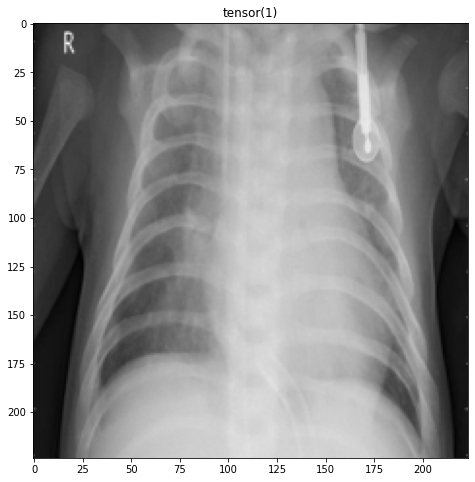

In [ ]:
plt.imshow(img_batch[4][0],cmap='gray')
plt.title(labels[4])
print(train_data.dataset.class_to_idx)

In [ ]:
from torchvision import models
from torch import device
model = models.vgg16(pretrained=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#Freezing all layers of the network
for param in model.parameters():
    param.requires_grad = False

#Adding a sequential layer to the end
import torch.nn as nn
n_inputs_last = model.classifier[6].in_features

#Removing the last layer of the pre-trained network
layers = list(model.classifier.children())[:-1]

#Adding new layers
layers.extend([nn.Linear(n_inputs_last, 2), nn.LogSoftmax(dim=1)])
model.classifier = nn.Sequential(*layers)
# device
model = model.to(device)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
from torch import nn, optim

#Initializations for training process
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
schedular = optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor = 0.1, patience = 5)
n_epochs = 20
valid_loss_min = np.Inf

In [ ]:
def accuracy(y_pred,y_true):
    y_pred = torch.exp(y_pred)
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

#Training process begins
train_loss_list = []
valid_loss_list = []
train_acc_list = []
valid_acc_list = []

for epoch in range(n_epochs):
    print('-' * 10)
    print(f'Epoch {epoch+1}/{n_epochs}')
    print('-' * 10)
    train_loss = train_acc = valid_loss = valid_acc = 0

    model.train()
    for i, (img, labels) in enumerate(train_dl):
        print(f"Training for batch number {i}")
        # Forward pass
        img = img.to(device)
        labels = labels.to(device)

        output = model(img)
        loss = criterion(output, labels)
        train_acc+=accuracy(output, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    
    print(f"Training fininshed for all batches")
    
    train_loss_list.append(train_loss/len(train_dl))
    train_acc_list.append(train_acc/len(train_dl))

    print(f"Training loss = {train_loss_list[-1]}; Training accuracy = {train_acc_list[-1]}")    

    #Training finish for 1 epoch; Validation loop begins
    model.eval()
    with torch.no_grad():
        for i, (img, labels) in enumerate(val_dl):
            # Forward pass
            img = img.to(device)
            labels = labels.to(device)

            output = model(img)
            loss = criterion(output, labels)
            valid_acc += accuracy(output, labels)
            valid_loss += loss.item()


        valid_loss_list.append(valid_loss/len(val_dl))
        valid_acc_list.append(valid_acc/len(val_dl))
        schedular.step(valid_loss_list[-1])

        print(f"Validation loss = {valid_loss_list[-1]}; Validation accuracy = {valid_acc_list[-1]}")

        if valid_loss_list[-1] <= valid_loss_min:
            valid_loss_min = valid_loss_list[-1]
            params = {'state_dict': model.state_dict() , 'val_loss_min': valid_loss_min}


----------
Epoch 1/20
----------
Training for batch number 0
Training for batch number 1
Training for batch number 2
Training for batch number 3
Training for batch number 4
Training for batch number 5
Training for batch number 6
Training for batch number 7
Training for batch number 8
Training for batch number 9
Training for batch number 10
Training for batch number 11
Training for batch number 12
Training for batch number 13
Training for batch number 14
Training for batch number 15
Training for batch number 16
Training for batch number 17
Training for batch number 18
Training for batch number 19
Training for batch number 20
Training for batch number 21
Training for batch number 22
Training for batch number 23
Training for batch number 24
Training for batch number 25
Training for batch number 26
Training for batch number 27
Training for batch number 28
Training for batch number 29
Training for batch number 30
Training for batch number 31
Training for batch number 32
Training for batch n

In [ ]:
with open(f'params_20.pkl','wb') as f:
		pickle.dump(params,f)
with open(f'model_20.pkl','wb') as f:
		pickle.dump(model,f)

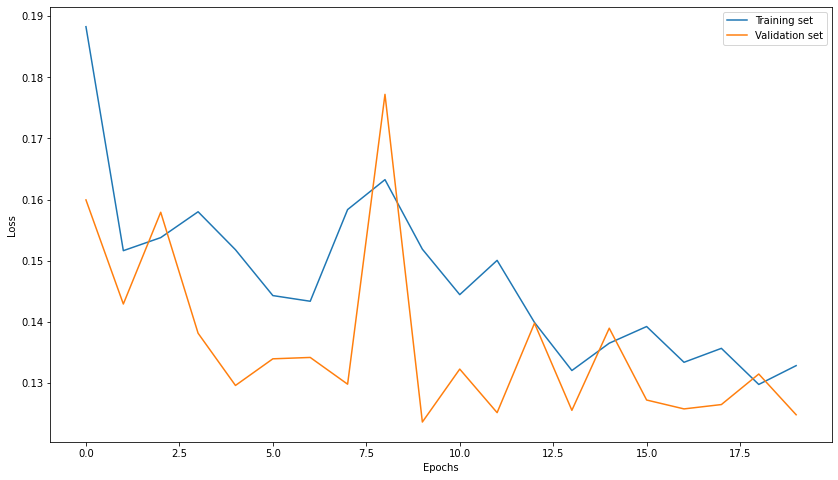

In [ ]:
plt.plot(train_loss_list,label = 'Training set')
plt.plot(valid_loss_list,label = "Validation set")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().set_ylim([0.3,0.05])
plt.legend()
plt.show()

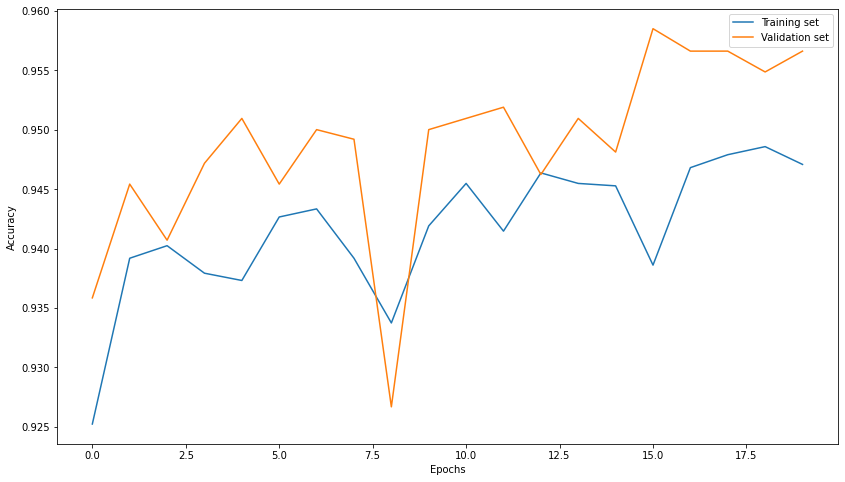

In [ ]:
plt.plot(train_acc_list,label = 'Training set')
plt.plot(valid_acc_list,label = 'Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.eval()

test_loss = 0
test_acc = 0

for images,labels in test_dl:
    
    images = images.to(device)
    labels = labels.to(device)
    
    pred = model(images)
    loss = criterion(pred,labels)
    
    test_loss += loss.item()
    test_acc += accuracy(pred,labels)
    
avg_test_loss = test_loss/len(test_dl)
avg_test_acc = test_acc/len(test_dl)

print("Test Loss : {:.6f} Test Acc : {:.6f}".format(avg_test_loss,avg_test_acc))

Test Loss : 0.507325 Test Acc : 0.818750


In [ ]:
def accuracy(y_pred,y_true):
    y_pred = torch.exp(y_pred)
    # print(y_pred)
    top_p,top_class = y_pred.topk(1,dim = 1)
    # print(y_pred.topk(1,dim = 1))
    equals = top_class == y_true.view(*top_class.shape)
    return [torch.mean(equals.type(torch.FloatTensor)), y_pred, top_class]

y_true = np.zeros((0,))
y_pred = []
y_pred_proba = []
model.eval()

test_loss = 0
test_acc = 0

for images,labels in test_dl:
    
    images = images.to(device)
    labels = labels.to(device)
    
    pred = model(images)
    loss = criterion(pred,labels)
    test_loss += loss.item()

    [a,b,c] = accuracy(pred,labels)

    y_true = np.concatenate([y_true, labels.cpu().numpy()])
    y_pred.append(c.cpu().numpy().ravel())
    y_pred_proba.append(b.cpu().detach().numpy())
    test_acc += a
    
avg_test_loss = test_loss/len(test_dl)
avg_test_acc = test_acc/len(test_dl)

# classes = ['NORMAL','PNEUMONIA']
# label_GT = np.zeros((0,))
# label_pred = np.zeros((0,))
# acc = 0
# model.eval()
# with torch.no_grad():
#     for idx, data in enumerate(test_loader):
#         inpts = data['data'].to(device)
#         target = data['label'].to(device)

#         probs = model(inpts)
#         pred = (probs.data > 0.5).int()
#         # features, labels = data[0].to(device), data[1].to(device)
#         # pred = torch.exp(model(features)).data.max(1)[1]

#         label_GT = np.concatenate([label_GT, target.cpu().numpy()])
#         label_pred = np.concatenate([label_pred, pred.cpu().numpy()])
#         acc += (pred == target).sum()
    
# print("Test Accuracy: {}".format(acc / len(test_loader.dataset)))
# mat = confusion_matrix(label_GT , label_pred)
# plt.matshow(mat/mat.sum(1),cmap = plt.cm.Blues)
# plt.xticks(range(2),classes, rotation = 'vertical')
# plt.yticks(range(2),classes)
# plt.show()
# print(mat)


In [ ]:
y_pred_final = []
for val in y_pred:
    for j in val:
        y_pred_final.append(j)
y_pred_final = np.array(y_pred_final)

In [ ]:
np.mean(y_true==np.array(y_pred_final))

0.8269230769230769

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_final))

              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72       234
         1.0       0.80      0.97      0.88       390

    accuracy                           0.83       624
   macro avg       0.86      0.78      0.80       624
weighted avg       0.84      0.83      0.82       624



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_final)


array([[137,  97],
       [ 11, 379]])

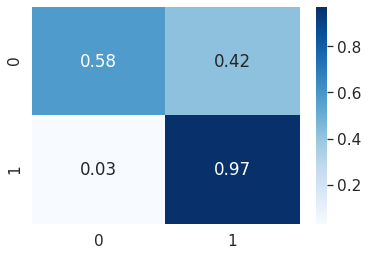

In [3]:
import numpy as np
import matplotlib.pyplot as plt
array = np.array([[0.58,0.42],[0.03,0.97]])
import pandas as pd
df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
import seaborn as sns
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap = plt.cm.Blues) # font s

In [52]:
from sklearn.metrics import f1_score

print(f1_score(y_true, y_pred_final, average='macro'))

print(f1_score(y_true, y_pred_final, average='micro'))

print(f1_score(y_true, y_pred_final, average='weighted'))


0.7962830852568831
0.8269230769230769
0.8160344848433551


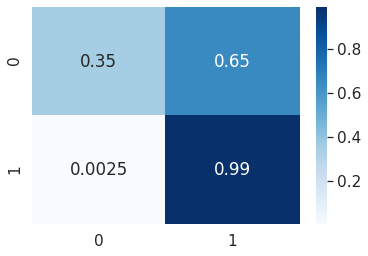

In [5]:
array = np.array([[0.35, 0.65],[0.0025, 0.99]])

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
import seaborn as sns
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap = plt.cm.Blues) # font s